In [74]:
import music21 as m2
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import collections  as mc


In [2]:
pwd()

'/home/siegman/Documents/Shahar/BarIlan/Dissertation3/notebooks'

In [119]:
midi_path = '../data/MIDI-Freestyle/Freestyle_1003.mid'

In [120]:
mf = m2.midi.MidiFile()
mf.open(midi_path)
mf.read()
mf.close()
   

In [122]:
ev = mf.tracks[0].events


In [123]:
df = pd.DataFrame(data=[e.__dict__ for e in ev])
df.insert(2,'type_str',df.type.map(lambda t: str(t).split('.')[-1]))
df.insert(4,'time_abs',df.time.cumsum())
df

,track,type,type_str,time,time_abs,channel,parameter1,parameter2,centShift,correspondingEvent,lastStatusByte
0,<music21.midi.MidiTrack 0 -- 4200 events>,DeltaTime,DeltaTime,0,0,NaN,None,NaN,None,None,NaN
1,<music21.midi.MidiTrack 0 -- 4200 events>,MetaEvents.SEQUENCE_TRACK_NAME,SEQUENCE_TRACK_NAME,0,0,NaN,b'7 2-Marimba1 Classic\x00',NaN,None,None,255.0
2,<music21.midi.MidiTrack 0 -- 4200 events>,DeltaTime,DeltaTime,0,0,NaN,None,NaN,None,None,NaN
3,<music21.midi.MidiTrack 0 -- 4200 events>,MetaEvents.TIME_SIGNATURE,TIME_SIGNATURE,0,0,NaN,b'\x04\x02$\x08',NaN,None,None,255.0
4,<music21.midi.MidiTrack 0 -- 4200 events>,DeltaTime,DeltaTime,0,0,NaN,None,NaN,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4195,<music21.midi.MidiTrack 0 -- 4200 events>,ChannelVoiceMessages.NOTE_ON,NOTE_ON,0,30255,1.0,48,48.0,None,None,144.0
4196,<music21.midi.MidiTrack 0 -- 4200 events>,DeltaTime,DeltaTime,13,30268,NaN,None,NaN,None,None,NaN
4197,<music21.midi.MidiTrack 0 -- 4200 events>,ChannelVoiceMessages.NOTE_OFF,NOTE_OFF,0,30268,1.0,48,64.0,None,None,128.0
4198,<music21.midi.MidiTrack 0 -- 4200 events>,DeltaTime,DeltaTime,0,30268,NaN,None,NaN,None,None,NaN


In [61]:
df[df.type_str=='TIME_SIGNATURE']

,track,type,type_str,time,channel,parameter1,parameter2,centShift,correspondingEvent,lastStatusByte
3,<music21.midi.MidiTrack 0 -- 9348 events>,MetaEvents.TIME_SIGNATURE,TIME_SIGNATURE,0,NaN,b'\x04\x02$\x08',NaN,None,None,255.0
5,<music21.midi.MidiTrack 0 -- 9348 events>,MetaEvents.TIME_SIGNATURE,TIME_SIGNATURE,0,NaN,b'\x04\x02$\x08',NaN,None,None,255.0


In [67]:
df[df.type_str=='DeltaTime'].time.value_counts()

0       560
2       407
1       400
5       381
3       345
       ... 
58        1
62        1
74        1
82        1
2974      1
Name: time, Length: 76, dtype: int64

In [68]:
df[df.time > 0].type_str.value_counts()

DeltaTime    4114
Name: type_str, dtype: int64

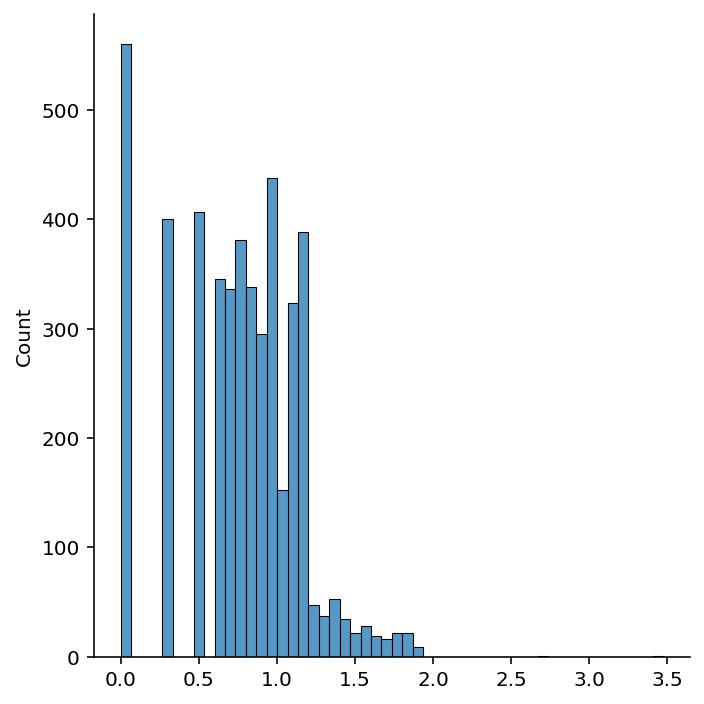

In [52]:
sns.displot(data = np.log10(df['time'][df.type=='DeltaTime'].values+1))

In [108]:
all_events = {}
open_events = {}
for row in df[df.type_str.isin(['NOTE_ON','NOTE_OFF'])].itertuples():
    if row.type_str=='NOTE_ON':
        open_events[row.parameter1]=row.time_abs
    else:
        all_events[row.parameter1]=all_events.get(row.parameter1,[])+[(open_events[row.parameter1], row.time_abs)]


all_events
    

{43: [(2974, 2987),
  (3128, 3134),
  (3134, 3147),
  (3308, 3314),
  (3314, 3327),
  (3391, 3404),
  (3447, 3461),
  (3484, 3498),
  (3555, 3568),
  (3661, 3674),
  (3775, 3782),
  (3782, 3794),
  (3913, 3926),
  (3942, 3955),
  (3985, 3992),
  (3993, 4006),
  (4070, 4082),
  (4154, 4166),
  (4291, 4304),
  (4332, 4338),
  (4338, 4351),
  (4439, 4452),
  (4482, 4495),
  (4528, 4541),
  (4572, 4584),
  (4633, 4646),
  (4685, 4697),
  (4785, 4798),
  (4834, 4848),
  (4887, 4901),
  (4923, 4935),
  (4961, 4974),
  (4999, 5012),
  (5216, 5229),
  (5280, 5292),
  (5321, 5335),
  (5398, 5411),
  (5440, 5452),
  (5484, 5496),
  (5528, 5541),
  (5611, 5624),
  (5703, 5716),
  (5880, 5893),
  (5980, 5992),
  (6074, 6088),
  (6104, 6116),
  (6146, 6159),
  (6171, 6184),
  (6192, 6205),
  (6214, 6227),
  (6258, 6271),
  (6306, 6318),
  (6355, 6368),
  (6376, 6389),
  (6397, 6410),
  (6462, 6474),
  (6480, 6493),
  (6541, 6554),
  (6599, 6612),
  (6654, 6667),
  (6676, 6688),
  (6719, 6732),
  (6

In [72]:
list(all_events.keys())

[43, 45, 48]

In [73]:
[len(a) for a in all_events.values()]

[706, 912, 717]

In [106]:
lines = [
    [[(t[0],k),(t[1],k)] for t in v]
    for k, v in all_events.items()
]
lines=sum(lines,200[])

lines[:4]

[[(2974, 43), (2987, 43)],
 [(3128, 43), (3134, 43)],
 [(3134, 43), (3147, 43)],
 [(3308, 43), (3314, 43)]]

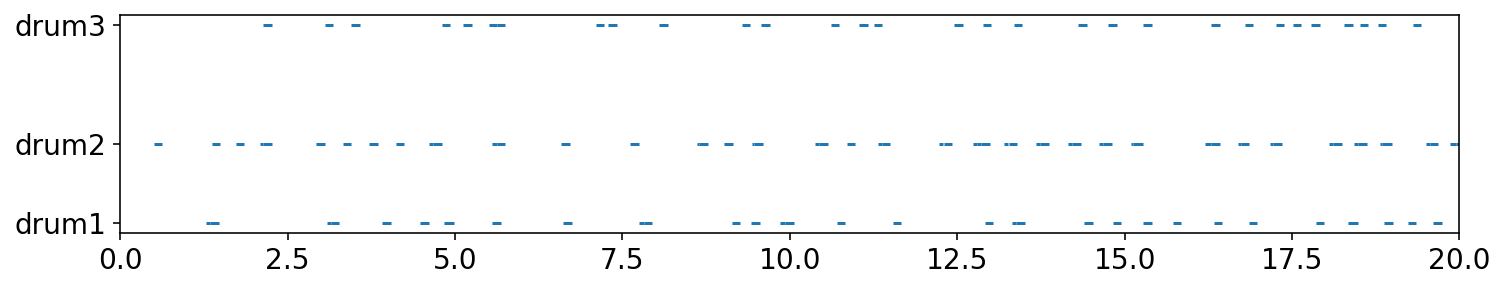

In [145]:
fig, ax = plt.subplots(figsize=(12,2))
ax.add_collection(mc.LineCollection(lines))
#    [(1, 0), (2, 0)],
#    [(3128, 3134), (43, 43)]
#    ]))
ax.autoscale()
plt.xlim(3000,5000)
plt.xscale("linear")
plt.xticks(range(3000,5001,250),np.arange(0,21.,2.5),fontsize=14);
plt.yticks([43,45,48],['drum{}'.format(a) for a in range(1,4)],fontsize=14);

In [85]:
np.array(lines).shape

(2335, 2, 2)

In [116]:
mf.ticksPerQuarterNote


96

In [118]:
print(mf.ticksPerSecond)

None


In [ ]:
mf.200200